In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib

In [2]:
buildingtypes = ['Office', 'PrimClass', 'UnivClass', 'UnivDorm', 'UnivLab']
def assign_buildingtype(name):
    if 'Office' in name:
        return 'Office'
    elif "PrimClass" in name:
        return "PrimClass"
    elif "UnivClass" in name:
        return "UnivClass"
    elif "UnivDorm" in name:
        return "UnivDorm"
    else:
        return "UnivLab"

In [3]:
def assign_traintestSplit(split):
    if split == str([13,1]):
        return '3monthsTrain_1weekTest'
    elif split == str([13,13]):
        return '3monthsTrain_3monthsTest'
    elif split == str([26,1]):
        return '6monthsTrain_1weekTest'
    elif split == str([26,13]):
        return '6monthsTrain_3monthsTest'
    elif split == str([39,1]):
        return '9monthsTrain_1weekTest'
    elif split == str([39,13]):
        return '9monthsTrain_3monthsTest'

In [4]:
def assign_function(func):
    if 'f_regression' in func:
        return 'f_regression'
    elif "mutual_info_regression" in func:
        return "mutual_info_regression"

# Visulisation for parametrics

In [5]:
# Read result
basic_result = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/New_scope/Modulated_features_selection_weeks/RandomForestRegressor_metrics_cross_validation_mean_P.csv') 
basic_result['Function'] = basic_result.Filter_function.apply(lambda x: assign_function(x))
basic_result['buildingtype'] = basic_result.buildingName.apply(lambda x: assign_buildingtype(x))
basic_result['Train_testSplit'] = basic_result.trainedtestWeeks_.apply(lambda x: assign_traintestSplit(x))
basic_result.drop('trainedtestWeeks_',axis=1).drop('Filter_function',axis=1).head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,Cor_threshold,BestKfeatures,Retained_Imp,Function,buildingtype,Train_testSplit
0,UnivLab_Lilly,38.603130,38.971044,48.547396,42.183151,44.475511,42.556046,0.7,55,95,f_regression,UnivLab,3monthsTrain_1weekTest
1,UnivLab_Lilly,44.440139,46.817889,45.281192,46.852142,43.574801,45.393233,0.7,55,95,f_regression,UnivLab,3monthsTrain_3monthsTest
2,UnivLab_Lilly,41.125025,37.513754,33.809367,29.841268,30.715061,34.600895,0.7,55,95,f_regression,UnivLab,6monthsTrain_1weekTest
3,UnivLab_Lilly,41.773272,42.930384,40.537354,42.903404,43.225295,42.273942,0.7,55,95,f_regression,UnivLab,6monthsTrain_3monthsTest
4,UnivLab_Lilly,29.287146,29.980827,39.786705,44.836997,37.181879,36.214711,0.7,55,95,f_regression,UnivLab,9monthsTrain_1weekTest


/Users/t.wang/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


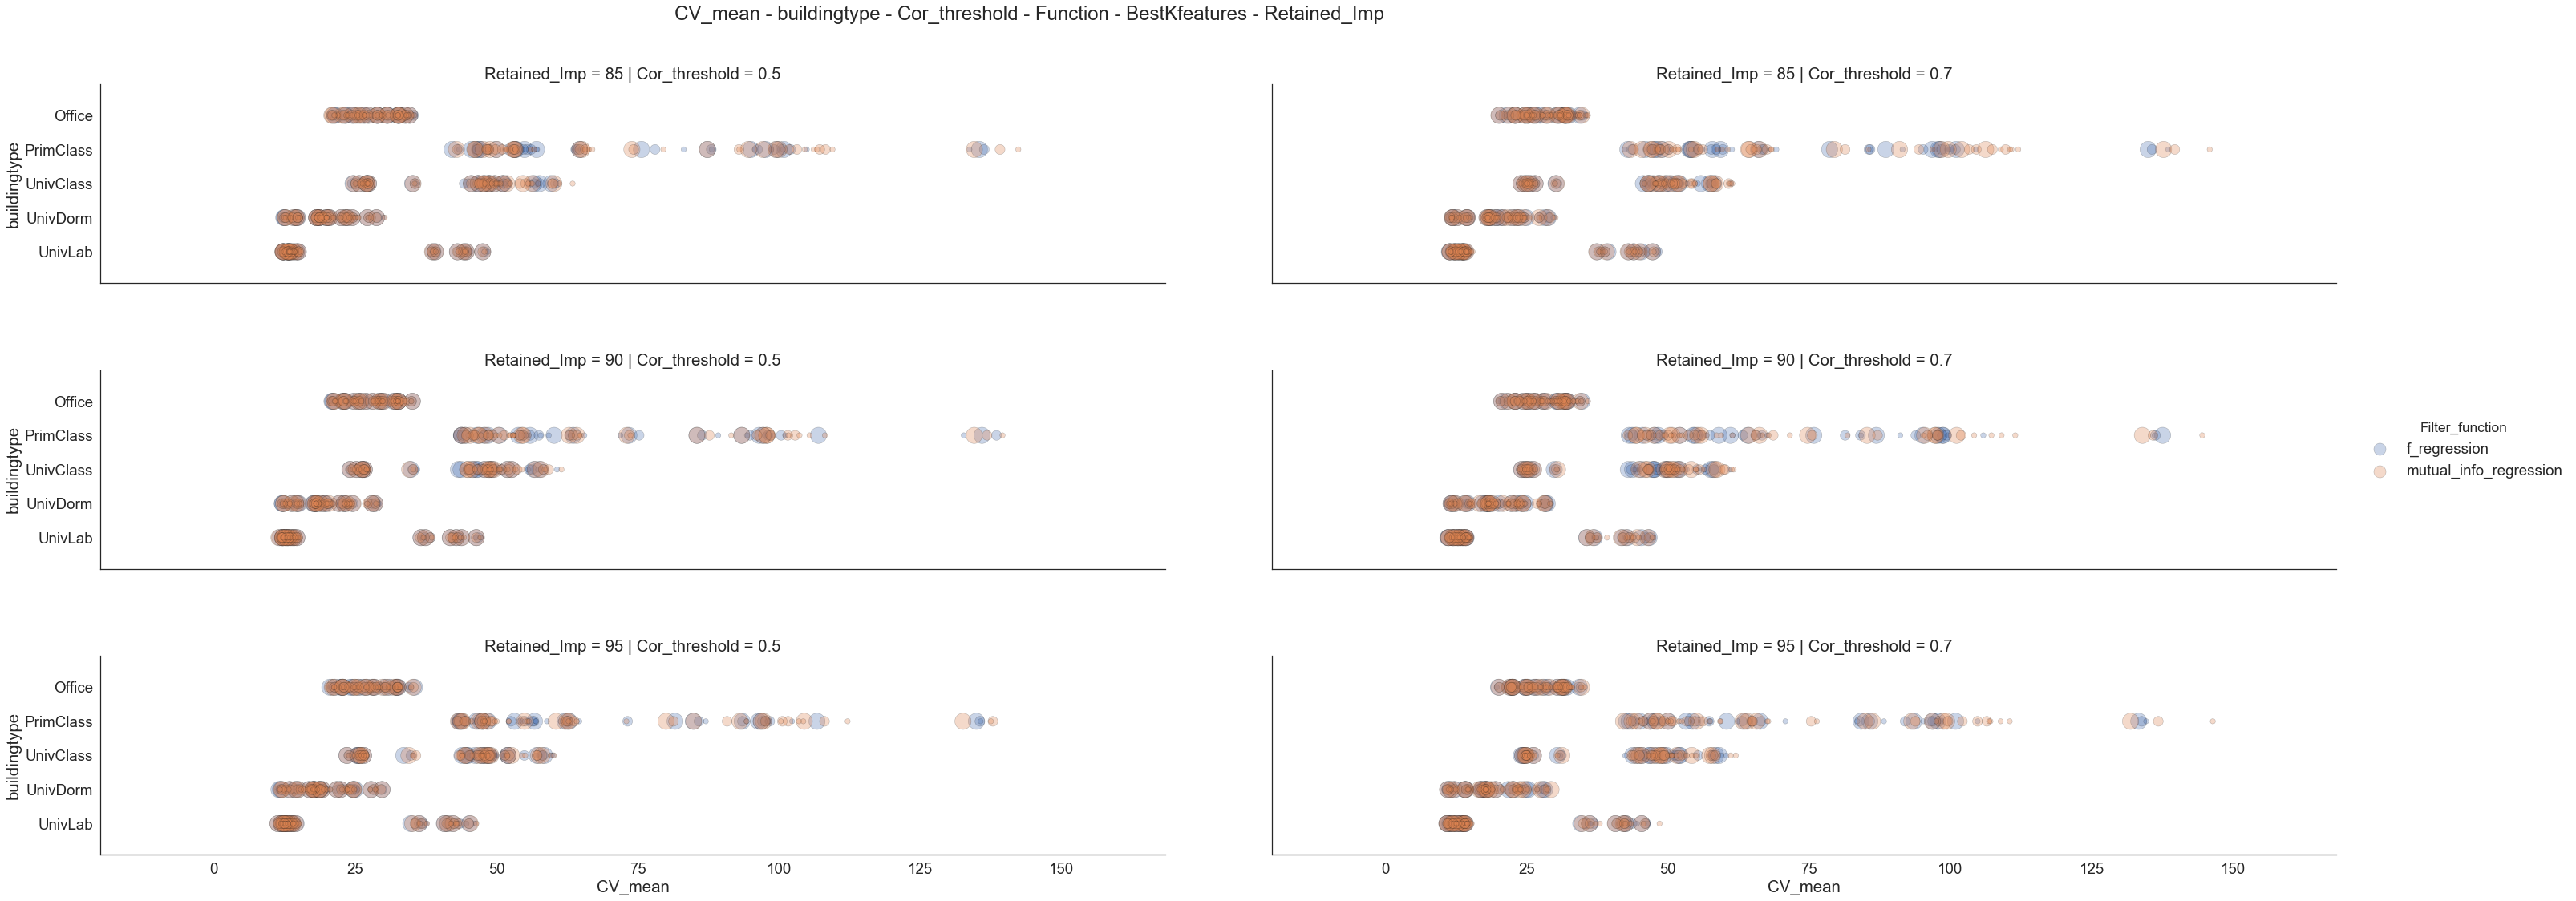

In [11]:
sns.set(font_scale=1.7,style='white')

g = sns.FacetGrid(basic_result, row="Retained_Imp", col="Cor_threshold", hue='Function', height=2)
g.map(plt.scatter,  'CV_mean', 'buildingtype', alpha=0.3, 
      edgecolor='k', linewidth=0.5, s=(basic_result['BestKfeatures']/16.5)**5) #magnify the size difference
fig = g.fig 
fig.set_size_inches(50, 17)
fig.subplots_adjust(top=0.9, wspace=0.1)
fig.suptitle('CV_mean - buildingtype - Cor_threshold - Function - BestKfeatures - Retained_Imp', fontsize=24)
l = g.add_legend(title='Filter_function')

In [7]:
print(((basic_result['BestKfeatures']/16.5)**5).unique())

[411.52263374 150.8838815   42.94578056]


# Data Table Sorting

In [8]:
result = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/New_scope/Modulated_features_selection_weeks/RandomForestRegressor_metrics_cross_validation_mean_P.csv') 
result['Function'] = result.Filter_function.apply(lambda x: assign_function(x))
result['buildingtype'] = result.buildingName.apply(lambda x: assign_buildingtype(x))
result['Train_testSplit'] = result.trainedtestWeeks_.apply(lambda x: assign_traintestSplit(x))
x = result.drop('trainedtestWeeks_',axis=1).drop('Filter_function',axis=1)
x[x['buildingtype']=='PrimClass'].sort_values('CV_mean').head()

,buildingName,CV_1,CV_2,CV_3,CV_4,CV_5,CV_mean,Cor_threshold,BestKfeatures,Retained_Imp,Function,buildingtype,Train_testSplit
2496,PrimClass_Jamie,34.203982,47.626985,40.316027,48.751281,39.832220,42.146099,0.5,55,85,f_regression,PrimClass,3monthsTrain_1weekTest
606,PrimClass_Jamie,30.357427,45.906308,38.830344,59.141584,36.583697,42.163872,0.7,55,95,mutual_info_regression,PrimClass,3monthsTrain_1weekTest
2406,PrimClass_Jamie,39.507076,45.754235,41.628827,48.498346,36.609386,42.399574,0.7,35,85,f_regression,PrimClass,3monthsTrain_1weekTest
66,PrimClass_Jamie,29.800594,48.063250,39.733304,60.242457,35.678137,42.703549,0.7,55,95,f_regression,PrimClass,3monthsTrain_1weekTest
1326,PrimClass_Jamie,33.263587,46.273315,42.728306,55.960725,36.194157,42.884018,0.7,35,90,f_regression,PrimClass,3monthsTrain_1weekTest
